# WeatherPy
----


In [71]:
# Dependencies and Setup
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
#initialize openweathermap url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#initiate a counter
counter = 0

#create lists to store data
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
cntry = []
dt = []

city_ls = []

print("Beginning data retrieval...")
for city in cities:
    counter += 1
    response = requests.get(query_url + city).json()
    print(f"Processing record {counter} | City: {city}")
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"] )
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        cntry.append(response["sys"]["country"])
        dt.append(response["dt"])
        city_ls.append(city)
    except:
        print(f"Could not find all data for city: {city}")
    
    #print(query_url + city)
    time.sleep(1)
#    if counter == 5:
#        break

#print(f"The cities are: {city_ls}")
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lng}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {humid}")
#print(f"The cloud information received is: {cloud}")
#print(f"The windy information received is: {wind}")
#print(f"The country information received is: {cntry}")
#print(f"The datetime information received is: {dt}")

Beginning data retrieval...
Processing record 1 | City: ushuaia
Processing record 2 | City: kautokeino
Processing record 3 | City: amderma
Could not find all data for city: amderma
Processing record 4 | City: turukhansk
Processing record 5 | City: vaini
Processing record 6 | City: benito juarez
Processing record 7 | City: lata
Processing record 8 | City: busselton
Processing record 9 | City: kaele
Processing record 10 | City: aripuana
Processing record 11 | City: sinnamary
Processing record 12 | City: honghu
Processing record 13 | City: rikitea
Processing record 14 | City: cape town
Processing record 15 | City: port lincoln
Processing record 16 | City: mahebourg
Processing record 17 | City: chokurdakh
Processing record 18 | City: puerto baquerizo moreno
Processing record 19 | City: pandan
Processing record 20 | City: punta arenas
Processing record 21 | City: kapaa
Processing record 22 | City: palabuhanratu
Could not find all data for city: palabuhanratu
Processing record 23 | City: bar

Processing record 187 | City: pemangkat
Processing record 188 | City: tenenkou
Processing record 189 | City: narsaq
Processing record 190 | City: sao filipe
Processing record 191 | City: key west
Processing record 192 | City: khandbari
Processing record 193 | City: dakar
Processing record 194 | City: buckeye
Processing record 195 | City: mehamn
Processing record 196 | City: sarakhs
Processing record 197 | City: verkhnevilyuysk
Processing record 198 | City: mount gambier
Processing record 199 | City: tual
Processing record 200 | City: valuyki
Processing record 201 | City: goderich
Processing record 202 | City: yenagoa
Processing record 203 | City: darhan
Processing record 204 | City: nizwa
Processing record 205 | City: buala
Processing record 206 | City: diplo
Processing record 207 | City: mercedes
Processing record 208 | City: malazgirt
Processing record 209 | City: yomitan
Could not find all data for city: yomitan
Processing record 210 | City: salaga
Processing record 211 | City: atta

Processing record 378 | City: fairbanks
Processing record 379 | City: kuche
Could not find all data for city: kuche
Processing record 380 | City: broome
Processing record 381 | City: missoula
Processing record 382 | City: provost
Processing record 383 | City: lokosovo
Processing record 384 | City: kearney
Processing record 385 | City: gushikawa
Processing record 386 | City: kenai
Processing record 387 | City: zhanaozen
Processing record 388 | City: bathsheba
Processing record 389 | City: iquique
Processing record 390 | City: faya
Processing record 391 | City: kamaishi
Processing record 392 | City: fort saint john
Could not find all data for city: fort saint john
Processing record 393 | City: beisfjord
Processing record 394 | City: aranos
Processing record 395 | City: yulara
Processing record 396 | City: gumrak
Processing record 397 | City: saldanha
Processing record 398 | City: sambava
Processing record 399 | City: yanchukan
Could not find all data for city: yanchukan
Processing record

Processing record 576 | City: harper
Processing record 577 | City: surin
Processing record 578 | City: bolungarvik
Could not find all data for city: bolungarvik
Processing record 579 | City: dossor
Processing record 580 | City: santa maria
Processing record 581 | City: tolaga bay
Processing record 582 | City: yumen
Processing record 583 | City: litoral del san juan
Could not find all data for city: litoral del san juan
Processing record 584 | City: ouesso
Processing record 585 | City: athabasca
Processing record 586 | City: gat
Processing record 587 | City: zachagansk
Could not find all data for city: zachagansk
Processing record 588 | City: shenjiamen
Processing record 589 | City: maloy
Processing record 590 | City: korla
Processing record 591 | City: lamu
Processing record 592 | City: lambarene
Processing record 593 | City: mountain home
Processing record 594 | City: colares
Processing record 595 | City: jacmel
Processing record 596 | City: camapua
Processing record 597 | City: campb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_ls,
    "Lat": lat,
    "Lng": lat,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cntry,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-54.8000,68.00,64,0,3.44,AR,1612918087
1,kautokeino,69.0125,69.0125,4.37,93,100,3.71,NO,1612917927
2,turukhansk,65.8167,65.8167,-1.61,92,100,12.84,RU,1612918109
3,vaini,-21.2000,-21.2000,78.80,94,90,20.71,TO,1612918110
4,benito juarez,19.3850,19.3850,71.60,26,75,8.05,MX,1612918481


In [42]:
#save weather data to csv output file
try:
    weather_data.to_csv(output_data_file, index=False)
    print(f"Weather data saved to: {output_data_file}")
except:
    print(f"City weather data not saved.")

Weather data saved to: ../output_data/cities.csv


## Inspect the data and remove the cities where the humidity > 100%.
----


In [68]:
#set csv file
weather_csv = "../output_data/cities.csv"

#read csv into dataframe
weather_df = pd.read_csv(weather_csv)

#determine original row count
orig_len = len(weather_df)

#drop dataframe rows where the humidity is above 100
indexes_to_drop = weather_df.loc[weather_df["Humidity"]>100, :].index

#drop any rows within current dataframe where humidity above 100%
weather_df.drop(indexes_to_drop, inplace=True)

#determine new row count
dropped_index_len = len(weather_df)

#determine if rows were dropped due to over 100 humidity
if orig_len == dropped_index_len:
    print(f"There were no records with humidity above 100%.")
    
else:
    dropped_row_count = orig_len - dropped_index_len
    print(f"There were {dropped_row_count} rows dropped. The new row count is {dropped_index_len}.")
    
weather_df.head()

There were no records with humidity above 100%.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Converted Date
0,ushuaia,-54.8000,-54.8000,68.00,64,0,3.44,AR,1612918087,2021-02-10 00:48:07
1,kautokeino,69.0125,69.0125,4.37,93,100,3.71,NO,1612917927,2021-02-10 00:45:27
2,turukhansk,65.8167,65.8167,-1.61,92,100,12.84,RU,1612918109,2021-02-10 00:48:29
3,vaini,-21.2000,-21.2000,78.80,94,90,20.71,TO,1612918110,2021-02-10 00:48:30
4,benito juarez,19.3850,19.3850,71.60,26,75,8.05,MX,1612918481,2021-02-10 00:54:41


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

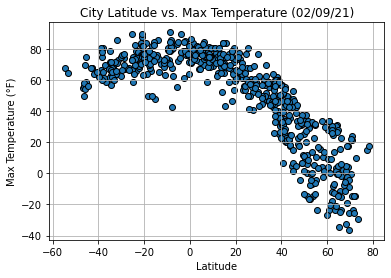

In [78]:
lat_axis = weather_df["Lat"]
temp_axis = weather_df["Max Temp"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, temp_axis, edgecolors="black")
plt.ylabel("Max Temperature (\N{DEGREE SIGN}F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

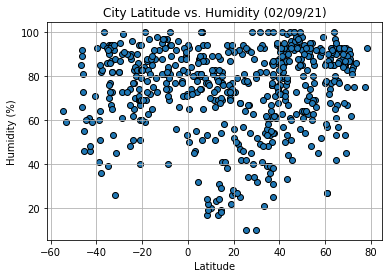

In [80]:
lat_axis = weather_df["Lat"]
humid_axis = weather_df["Humidity"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, humid_axis, edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

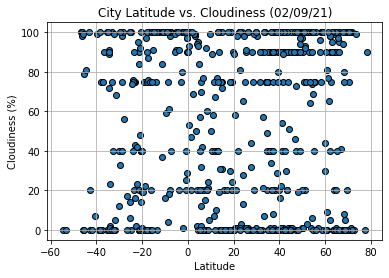

In [81]:
lat_axis = weather_df["Lat"]
cloud_axis = weather_df["Cloudiness"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, cloud_axis, edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

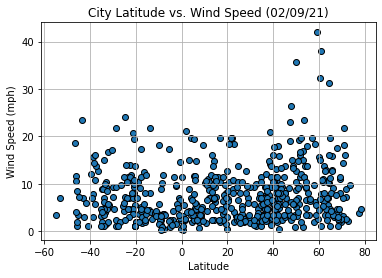

In [82]:
lat_axis = weather_df["Lat"]
wind_axis = weather_df["Wind Speed"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, wind_axis, edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


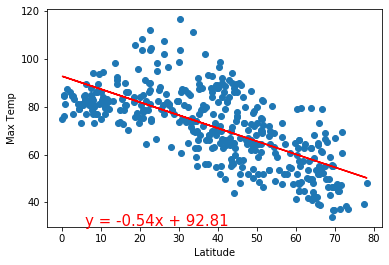

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


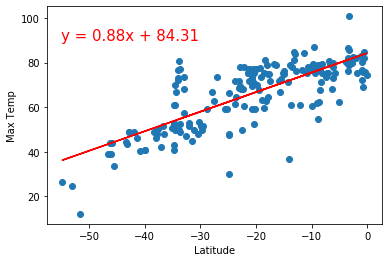

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


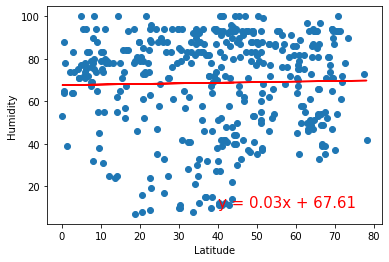

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


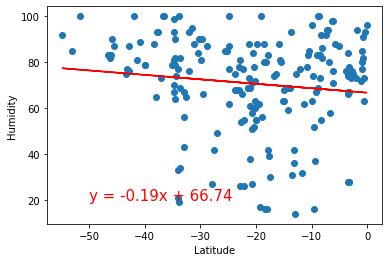

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


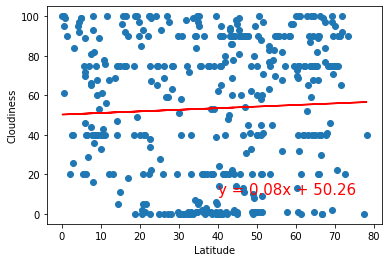

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


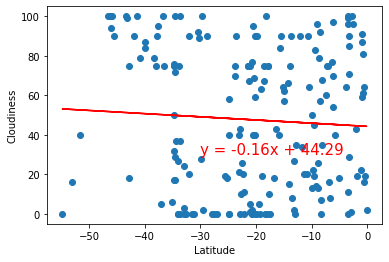

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


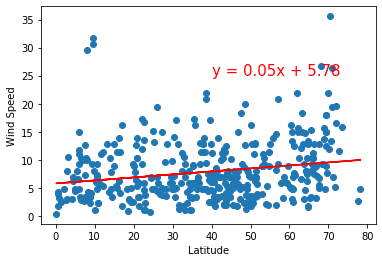

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


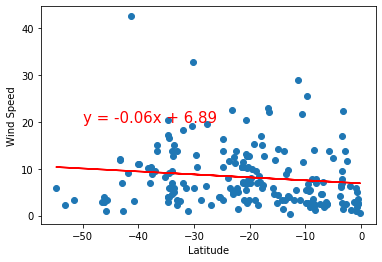